In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
%matplotlib inline
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import os
import shutil
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

import time
from tqdm import tqdm
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from subprocess import check_output
from sklearn.linear_model import LinearRegression

In [7]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('/content/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
data.info()
data.columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


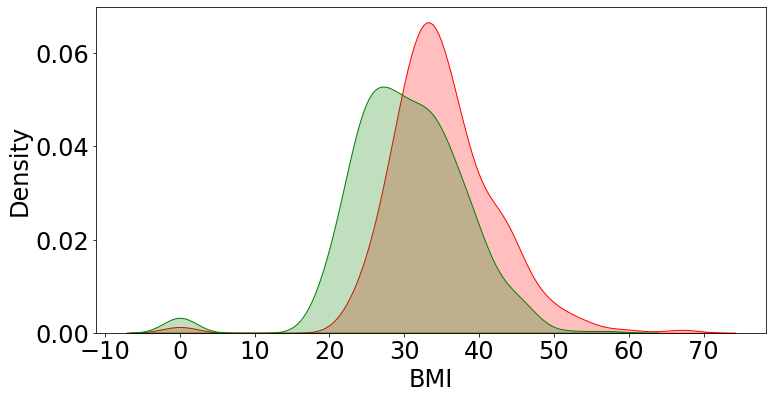

In [11]:
plt.figure(figsize=(12,6))

sns.kdeplot(data[data['Outcome']==1]['BMI'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['BMI'],shade=True,color='green')

In [12]:
data = data.loc[data['BMI'] != 0]

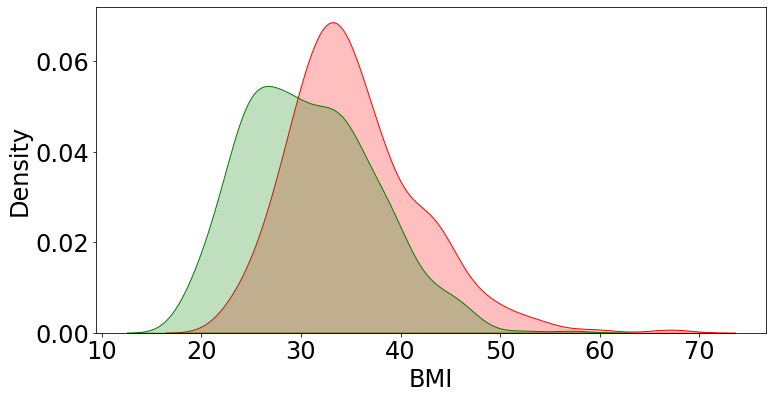

In [13]:
plt.figure(figsize=(12,6))

sns.kdeplot(data[data['Outcome']==1]['BMI'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['BMI'],shade=True,color='green')

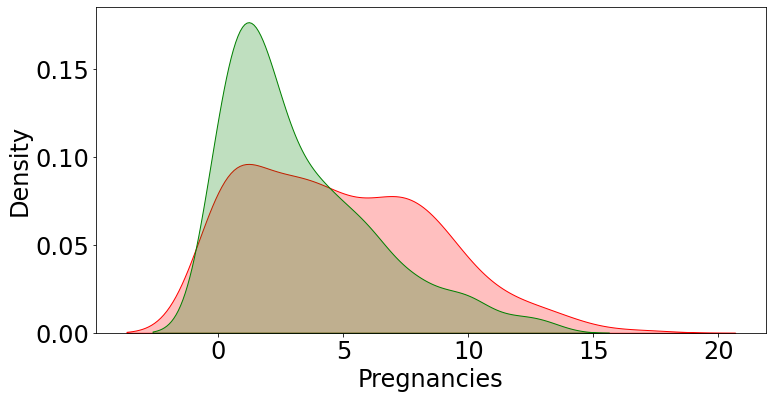

In [14]:
plt.figure(figsize=(12,6))

sns.kdeplot(data[data['Outcome']==1]['Pregnancies'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['Pregnancies'],shade=True,color='green')

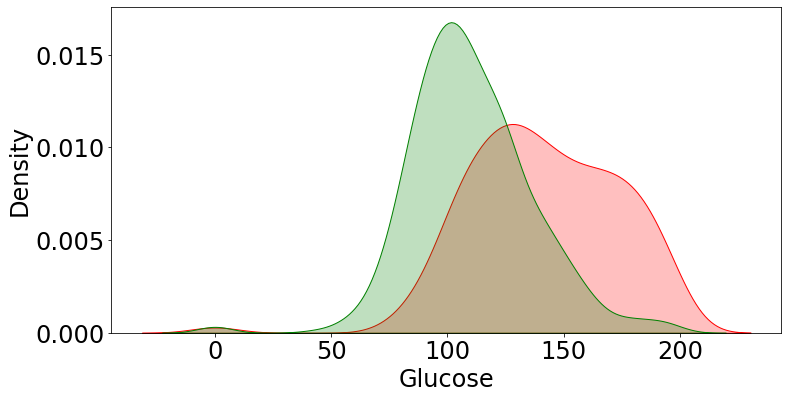

In [15]:
plt.figure(figsize=(12,6))

sns.kdeplot(data[data['Outcome']==1]['Glucose'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['Glucose'],shade=True,color='green')

In [16]:
data = data.loc[data['Glucose'] != 0]

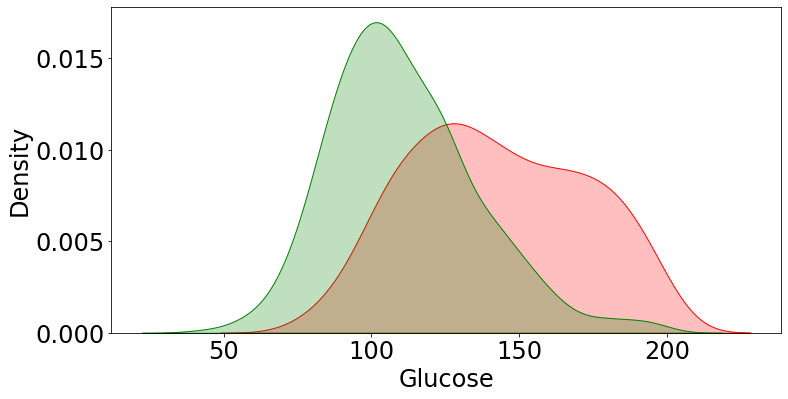

In [17]:
plt.figure(figsize=(12,6))

sns.kdeplot(data[data['Outcome']==1]['Glucose'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['Glucose'],shade=True,color='green')

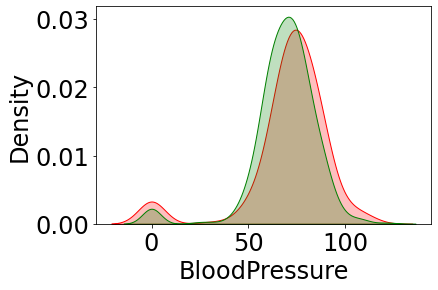

In [18]:
sns.kdeplot(data[data['Outcome']==1]['BloodPressure'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['BloodPressure'],shade=True,color='green')

In [19]:
data = data.loc[data['BloodPressure'] != 0]

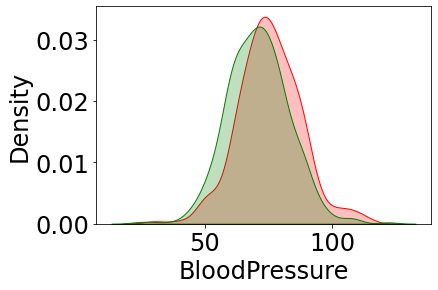

In [20]:
sns.kdeplot(data[data['Outcome']==1]['BloodPressure'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['BloodPressure'],shade=True,color='green')

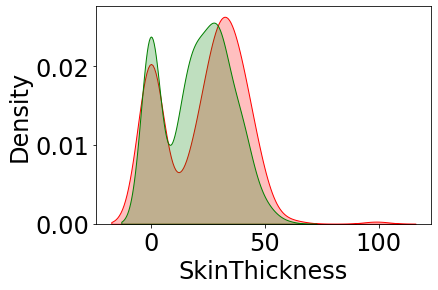

In [21]:
sns.kdeplot(data[data['Outcome']==1]['SkinThickness'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['SkinThickness'],shade=True,color='green')

In [22]:
data = data.loc[data['SkinThickness'] != 0]

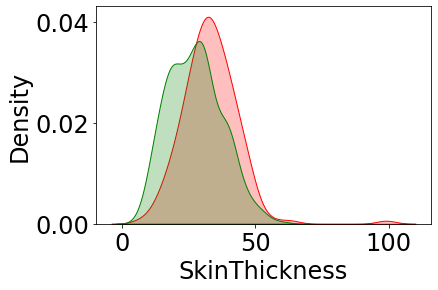

In [23]:
sns.kdeplot(data[data['Outcome']==1]['SkinThickness'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['SkinThickness'],shade=True,color='green')

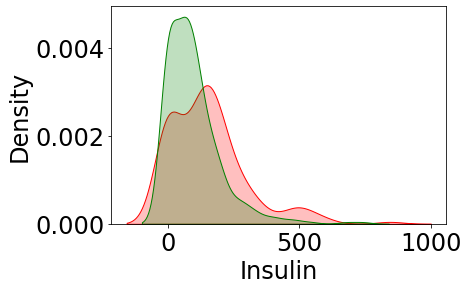

In [24]:
sns.kdeplot(data[data['Outcome']==1]['Insulin'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['Insulin'],shade=True,color='green')

In [25]:
data = data.loc[data['Insulin'] != 0]

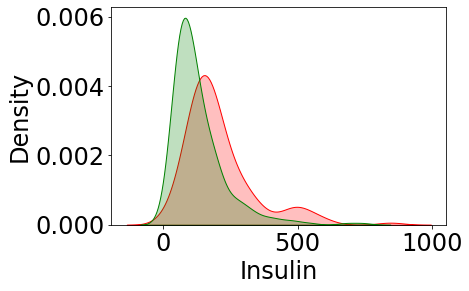

In [26]:
sns.kdeplot(data[data['Outcome']==1]['Insulin'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['Insulin'],shade=True,color='green')

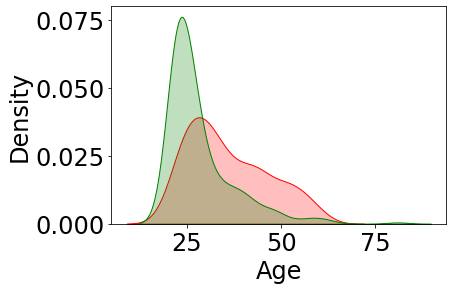

In [27]:
sns.kdeplot(data[data['Outcome']==1]['Age'],shade=True,color='red')

sns.kdeplot(data[data['Outcome']==0]['Age'],shade=True,color='green')

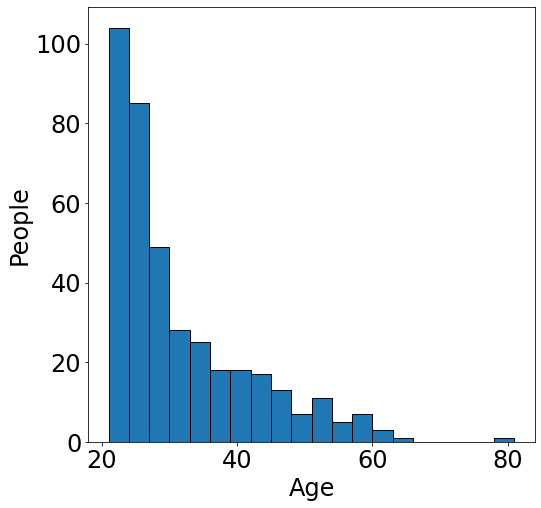

In [28]:
figsize(8, 8)

plt.hist(data['Age'].dropna(), bins = 20, edgecolor = 'black');

plt.xlabel('Age'); 

plt.ylabel('People');

In [29]:
correlations_data = data.corr()['Outcome'].sort_values()

print(correlations_data.head(5), '\n')

print(correlations_data.tail(5))

BloodPressure               0.192673
DiabetesPedigreeFunction    0.209330
SkinThickness               0.255936
Pregnancies                 0.256566
BMI                         0.270118
Name: Outcome, dtype: float64 

BMI        0.270118
Insulin    0.301429
Age        0.350804
Glucose    0.515703
Outcome    1.000000
Name: Outcome, dtype: float64


In [30]:
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'Outcome':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

categorical_subset = data[['Age', 'Glucose', 'Insulin']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features = features.dropna(subset = ['Outcome'])

correlations = features.corr()['Outcome'].dropna().sort_values()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
correlations.head(15)

log_BloodPressure                0.175883
sqrt_BloodPressure               0.185418
BloodPressure                    0.192673
sqrt_Pregnancies                 0.200282
log_DiabetesPedigreeFunction     0.206218
DiabetesPedigreeFunction         0.209330
sqrt_DiabetesPedigreeFunction    0.212373
SkinThickness                    0.255936
Pregnancies                      0.256566
log_SkinThickness                0.259778
sqrt_SkinThickness               0.260338
BMI                              0.270118
sqrt_BMI                         0.276450
log_BMI                          0.281173
log_Pregnancies                  0.281921
Name: Outcome, dtype: float64

In [32]:
correlations.tail(20)

Pregnancies           0.256566
log_SkinThickness     0.259778
sqrt_SkinThickness    0.260338
BMI                   0.270118
sqrt_BMI              0.276450
log_BMI               0.281173
log_Pregnancies       0.281921
Insulin               0.301429
Insulin               0.301429
sqrt_Insulin          0.337783
log_Insulin           0.348476
Age                   0.350804
Age                   0.350804
sqrt_Age              0.365459
log_Age               0.376869
log_Glucose           0.501462
sqrt_Glucose          0.510087
Glucose               0.515703
Glucose               0.515703
Outcome               1.000000
Name: Outcome, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


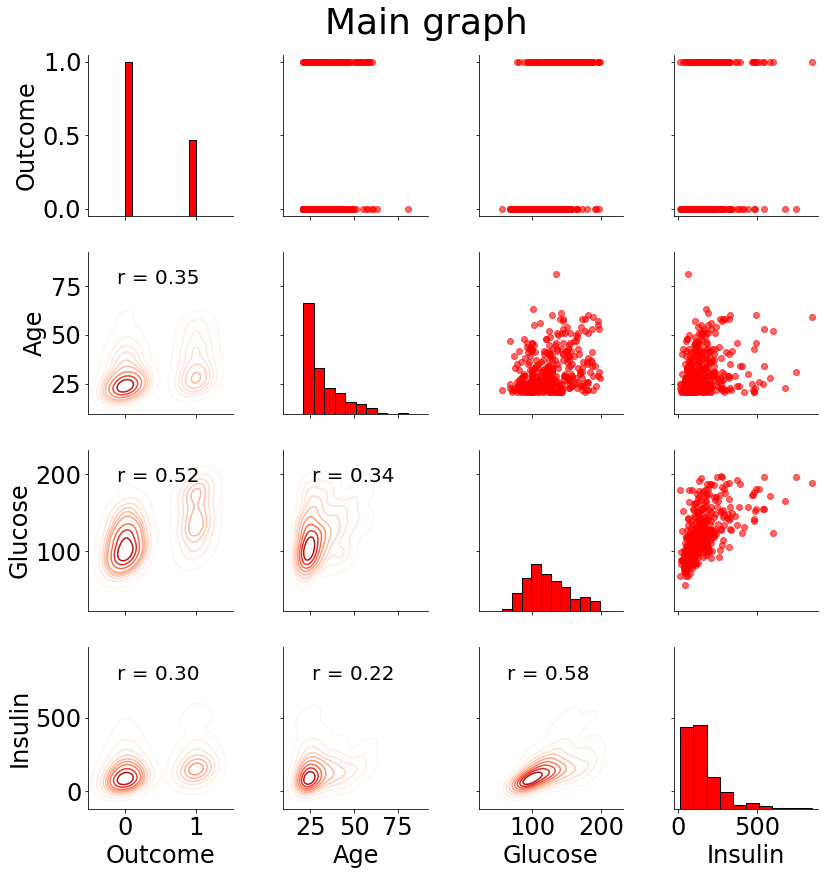

In [33]:
plot_data = data[['Outcome', 'Age', 
                      'Glucose', 
                      'Insulin']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

plot_data = plot_data.dropna()

def corr_func(x, y, **kwargs):

    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

grid = sns.PairGrid(data = plot_data, size = 3)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Main graph', size = 36, y = 1.02);

In [34]:
features = data.copy()

numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
categorical_subset = data[['Age', 'Insulin', 'Glucose']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(392, 21)

In [35]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,log_Pregnancies,log_Glucose,log_BloodPressure,log_SkinThickness,log_Insulin,log_BMI,log_DiabetesPedigreeFunction,log_Age,log_Outcome,Age,Insulin,Glucose
3,1,89,66,23,94,28.1,0.167,21,0,0.000000,4.488636,4.189655,3.135494,4.543295,3.335770,-1.789761,3.044522,-inf,21,94,89
4,0,137,40,35,168,43.1,2.288,33,1,-inf,4.919981,3.688879,3.555348,5.123964,3.763523,0.827678,3.496508,0.0,33,168,137
6,3,78,50,32,88,31.0,0.248,26,1,1.098612,4.356709,3.912023,3.465736,4.477337,3.433987,-1.394327,3.258097,0.0,26,88,78
8,2,197,70,45,543,30.5,0.158,53,1,0.693147,5.283204,4.248495,3.806662,6.297109,3.417727,-1.845160,3.970292,0.0,53,543,197
13,1,189,60,23,846,30.1,0.398,59,1,0.000000,5.241747,4.094345,3.135494,6.740519,3.404525,-0.921303,4.077537,0.0,59,846,189


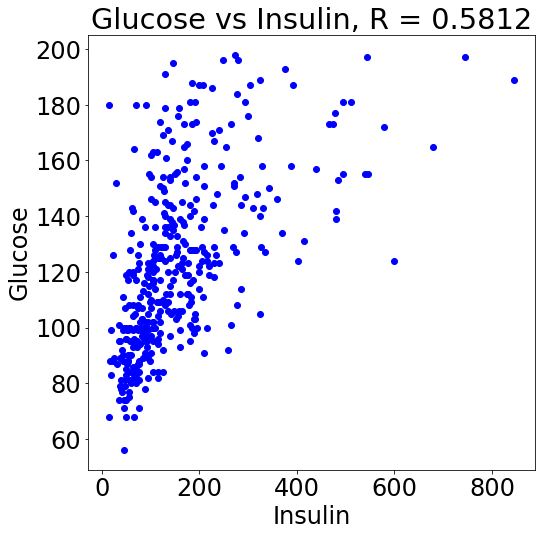

In [36]:
plot_data = data[['Glucose', 'Insulin']].dropna()

plt.plot(plot_data['Insulin'], plot_data['Glucose'], 'bo')

plt.xlabel('Insulin'); plt.ylabel('Glucose')

plt.title('Glucose vs Insulin, R = %0.4f' % np.corrcoef(data[['Glucose', 'Insulin']].dropna(), rowvar=False)[0][1]);

In [37]:
def remove_collinear_features(x, threshold):

    y = x['Outcome']
    x = x.drop(columns = ['Outcome'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:

        for j in range(i):

            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index

            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    x['Outcome'] = y
               
    return x

In [38]:
    features = remove_collinear_features(features, 0.6);

In [39]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(392, 6)

In [40]:
no_score = features[features['Outcome'].isna()]
score = features[features['Outcome'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 6)
(392, 6)


In [41]:
features = score.drop(columns='Outcome')
targets = pd.DataFrame(score['Outcome'])

features = features.replace({np.inf: np.nan, -np.inf: np.nan})

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(274, 5)
(118, 5)
(274, 1)
(118, 1)


In [42]:
features.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,log_Outcome
3,1,66,23,0.167,NaN
4,0,40,35,2.288,0.0
6,3,50,32,0.248,0.0
8,2,70,45,0.158,0.0
13,1,60,23,0.398,0.0


In [43]:
targets.head()

,Outcome
3,0
4,1
6,1
8,1
13,1


In [44]:
def mae(y_true, y_pred):
    
    return np.mean(abs(y_true - y_pred))

In [45]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 0.00
Baseline Performance on the test set: MAE = 0.3220


In [46]:
np.save("X", X)
np.save("X_test", X_test)
np.save("y", y)
np.save("y_test", y_test)

In [47]:
X = X.drop('log_Outcome', axis=1)

In [48]:
X

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction
225,1,78,27,0.101
39,4,72,47,1.390
617,2,62,13,0.257
54,7,66,42,0.718
265,5,74,18,0.997
...,...,...,...,...
150,1,74,50,0.399
220,0,60,29,1.072
528,0,66,31,0.493
673,3,100,35,0.880


In [49]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    
    def __b_intercept(self, X):
        
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)
    
    
    def __sigmoid_function(self, z):
        
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        
        #print(yp.shape)
        #print(y.shape)
        # this is the loss function which we use to minimize the error of our model
        
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        
        self.W = np.zeros(X.shape[1])
        self.W = self.W.reshape(self.W.size,1)
        
        # this for loop runs for the number of iterations provided
        
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            #print(self.W)
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            #yp = yp.reshape(y.size,1)
            # this is where the gradient is calculated form the error generated by our model
            
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            #print(self.W.shape, gradient.shape)
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            #print(gradient)
            
            ABC = self.learning_rate * gradient
            #print(self.W.shape)
            
            self.W = self.W - ABC 
            
            #print(self.W.shape,ABC.shape)
            # this is our new W * Xi
            
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            
            #print(yp.shape, z.shape, X.shape, self.W.shape)
            # this is where the loss is calculated
            
            loss = self.__loss(yp, y)
            
            #print(f'loss: {loss} \t')
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            #print(f'loss: {loss} \t')
            
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        
        # this is the final prediction that is generated based on the values learned.
        
        print(self.W.size, X.size())
        
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    
    def predict(self, X):
        return self.predict_prob(X)

In [50]:
%%time

model = LogisticRegression(learning_rate=0.1, num_iterations=3000)

model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


CPU times: user 6.3 s, sys: 242 ms, total: 6.54 s
Wall time: 6.27 s


In [51]:
#model.predict(X_test)
import sklearn.linear_model as lm

from sklearn.metrics import accuracy_score

In [52]:
lr    = lm.LogisticRegression()

lr.fit(X,y)
train_accuracy = lr.score(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print(train_accuracy)

0.7116788321167883
